In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### 1. Data Preparation

**데이터 불러오기**
- 메모리 사용량 최소화를 위해 Input 데이터 중 필요한 열을 고르고 데이터 타입을 정해서 불러옵니다.

In [2]:
df_head = pd.read_csv('input/ecommerce-behavior/2019-Nov.csv', nrows=5)
df_head

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [25]:
usecols = ['event_time', 'event_type', 'product_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']

categorical_dtypes = {
    'event_type':'category', 'product_id':'category',
    'category_code':'category', 'brand':'category', 
    'user_id':'category', 'user_session':'category'
}

In [26]:
df = pd.read_csv('input/ecommerce-behavior/2019-Nov.csv', dtype=categorical_dtypes, usecols=usecols)
print(df.shape)
print(df.columns)
print(df.dtypes)
df.tail()

(67501979, 8)
Index(['event_time', 'event_type', 'product_id', 'category_code', 'brand',
       'price', 'user_id', 'user_session'],
      dtype='object')
event_time         object
event_type       category
product_id       category
category_code    category
brand            category
price             float64
user_id          category
user_session     category
dtype: object


,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
67501974,2019-11-30 23:59:58 UTC,view,15700137,NaN,NaN,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
67501975,2019-11-30 23:59:58 UTC,view,28719425,apparel.shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
67501976,2019-11-30 23:59:59 UTC,view,1004833,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501977,2019-11-30 23:59:59 UTC,view,2701706,appliances.kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0
67501978,2019-11-30 23:59:59 UTC,view,1004233,electronics.smartphone,apple,1312.52,579969851,90aca71c-ed8a-4670-866a-761ebacb732d


**데이터 분류하기**
- 분석을 하기에 적합한 형태로 데이터를 변환 해 줍니다.

구매율 분석이 용이하도록 purchase 열을 추가하고 view, cart는 0으로 purchase는 1으로 분류합니다.

In [28]:
print(df["event_type"].sample(frac=0.01).nunique())
df["event_type"].value_counts()

3


view        63556110
cart         3028930
purchase      916939
Name: event_type, dtype: int64

In [29]:
df['purchase'] = np.where(df["event_type"]=="purchase", 1, 0)
print(pd.crosstab(df['event_type'], df['purchase']))

purchase           0       1
event_type                  
cart         3028930       0
purchase           0  916939
view        63556110       0


메모리 사용량 최소화를 위해 user_session, user_id, product_id의 고유 번호를 다시 지정해 줍니다.

In [30]:
df['user_session'] = df['user_session'].astype('category').cat.codes.astype('category')
df['user_id'] = df['user_id'].astype('category').cat.codes.astype('category')
df['product_id'] = df['product_id'].astype('category').cat.codes.astype('category')
df.tail()

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,purchase
67501974,2019-11-30 23:59:58+00:00,view,4628,NaN,NaN,277.74,2281153,13764788,0
67501975,2019-11-30 23:59:58+00:00,view,37808,apparel.shoes,baden,62.81,227720,13769867,0
67501976,2019-11-30 23:59:59+00:00,view,417,electronics.smartphone,samsung,167.03,3613608,13769709,0
67501977,2019-11-30 23:59:59+00:00,view,9047,appliances.kitchen.refrigerators,samsung,566.27,460280,13767080,0
67501978,2019-11-30 23:59:59+00:00,view,23937,electronics.smartphone,apple,1312.52,3696116,13771164,0


동일한 세션에서 동일 제품에 대해 중복된 활동을 한 경우 해당 행을 제거해 줍니다.
해당 데이터는 쿠폰 적용을 위해 동일 제품을 다시 구매하거나 뒤로가기 버튼을 눌러 이전 페이지에 접속했던 이력으로 예상됩니다.

In [31]:
df_targets = df.drop_duplicates(subset=['event_type', 'product_id', 'user_id', 'user_session'])
print(df_targets.shape)
print(df_targets.columns)
print(df_targets.dtypes)
df_targets.tail()

(44861467, 9)
Index(['event_time', 'event_type', 'product_id', 'category_code', 'brand',
       'price', 'user_id', 'user_session', 'purchase'],
      dtype='object')
event_time       datetime64[ns, UTC]
event_type                  category
product_id                  category
category_code               category
brand                       category
price                        float64
user_id                     category
user_session                category
purchase                       int32
dtype: object


,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,purchase
67501970,2019-11-30 23:59:55+00:00,view,5159,furniture.kitchen.table,aero,1106.85,3617366,13772890,0
67501971,2019-11-30 23:59:57+00:00,view,15859,electronics.telephone,prestigio,8.37,3696100,13774792,0
67501972,2019-11-30 23:59:57+00:00,view,24382,construction.tools.drill,bosch,266.16,2546436,13769777,0
67501973,2019-11-30 23:59:57+00:00,view,857,NaN,NaN,29.60,1719499,13771312,0
67501978,2019-11-30 23:59:59+00:00,view,23937,electronics.smartphone,apple,1312.52,3696116,13771164,0


제품의 종류를 구분하기 위해 category_code의 종류를 확인합니다.

In [32]:
print(df_targets["category_code"].sample(frac=0.01).nunique())
df_targets["category_code"].value_counts()

127


electronics.smartphone          10672788
apparel.shoes                    1480471
electronics.clocks               1426793
computers.notebook               1358579
electronics.video.tv             1285448
                                  ...   
apparel.shorts                       561
construction.tools.screw             121
appliances.kitchen.fryer              68
country_yard.furniture.bench           2
apparel.jacket                         1
Name: category_code, Length: 129, dtype: int64

카테고리가 129개 종류로 데이터 분석에 용이하지 않으므로 Level1 카테고리를 추가 해 줍니다.

In [33]:
df_targets["category_code_level1"] = df_targets["category_code"].str.split(".",expand=True)[0].astype('category')

print(df_targets["category_code_level1"].nunique())
df_targets["category_code_level1"].value_counts()

13


electronics     15526294
appliances       5072242
computers        2644624
apparel          2449721
furniture        1473797
auto              756348
construction      678286
kids              582894
accessories       310619
sport             163900
medicine           12346
country_yard       11217
stationery          8432
Name: category_code_level1, dtype: int64

분류가 완료된 데이터를 "2019-Nov_Prep.csv"로 저장 해 줍니다.

In [36]:
df_targets.to_csv("input/ecommerce-behavior/2019-Nov_Prep.csv", na_rep='NaN', index=False)

메모리 재할당을 위해 커널을 다시 시작합니다. 16GB 메모리는 데이터 분석에 충분하지 않습니다..

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
categorical_dtypes = {
    'event_type':'category', 'product_id':'category',
    'category_code':'category', 'brand':'category', 
    'user_id':'category', 'user_session':'category'
}

In [3]:
df = pd.read_csv('input/ecommerce-behavior/2019-Nov_Prep.csv', dtype=categorical_dtypes)

요일, 시간열 추가를 위해 event_time 열을 datetime format으로 변경해 줍니다.

In [4]:
df['event_time'] = pd.to_datetime(df['event_time'],infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44861467 entries, 0 to 44861466
Data columns (total 10 columns):
 #   Column                Dtype              
---  ------                -----              
 0   event_time            datetime64[ns, UTC]
 1   event_type            category           
 2   product_id            category           
 3   category_code         category           
 4   brand                 category           
 5   price                 float64            
 6   user_id               category           
 7   user_session          category           
 8   purchase              int64              
 9   category_code_level1  object             
dtypes: category(6), datetime64[ns, UTC](1), float64(1), int64(1), object(1)
memory usage: 3.0+ GB


lambda 함수를 이용해 요일과 시간을 새로운 열으로 분리 해 줍니다.

In [51]:
df['event_dayofweek'] = df['event_time'].apply(lambda x: x.dayofweek)
df['event_hour'] = df['event_time'].apply(lambda x: x.hour)

hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df['event_time_day'] = pd.cut(df['event_hour'], hours_bins, labels=hours_labels)

### 데이터 분석

**구매율 및 평균 구매 가격 분석**
- 앞서 분류한 열을 이용하여 구매율과 평균 가격을 비교해줍니다.

구매 시간별 가격평균을 확인해 본 결과 저녁에 구매 금액 평균이 다소 높았습니다.
구매 시간별 구매율을 확인해 본 결과 아침에 상품을 보거나 카트에 넣은 횟수 대비 상품을 구매한 비율이 높았습니다.

In [16]:
print (df[["event_time_day", "price"]].groupby(['event_time_day'], as_index=False).mean())

  event_time_day       price
0           Dawn  291.634065
1        Morning  296.801041
2      Afternoon  296.373512
3          Night  312.143396


In [52]:
print (df[["event_time_day", "purchase"]].groupby(['event_time_day'], as_index=False).mean())

  event_time_day  purchase
0           Dawn  0.018282
1        Morning  0.025138
2      Afternoon  0.016242
3          Night  0.010432


구매 요일별 가격 평균을 확인 해 본 결과 유의미한 차이는 없었습니다.
구매 요일별 구매율을 확인 해 본 결과 일요일의 구매율이 0.03으로 가장 높았습니다.

In [53]:
print (df[["event_dayofweek", "price"]].groupby(['event_dayofweek'], as_index=False).mean())

   event_dayofweek       price
0                0  290.936789
1                1  288.321664
2                2  288.114633
3                3  295.396084
4                4  295.913799
5                5  297.730689
6                6  293.933163


In [54]:
print (df[["event_dayofweek", "purchase"]].groupby(['event_dayofweek'], as_index=False).mean())

   event_dayofweek  purchase
0                0  0.019419
1                1  0.018689
2                2  0.018899
3                3  0.016464
4                4  0.011605
5                5  0.017450
6                6  0.031627


In [55]:
print(pd.crosstab(df['event_dayofweek'], df['purchase']))

purchase               0       1
event_dayofweek                 
0                4952737   98080
1                4745793   90383
2                4711040   90750
3                5380721   90071
4                8315151   97634
5                8608576  152889
6                7289565  238077


**RFM 분석**
- 고객의 과거 구매 이력을 바탕으로 고객군을 분류하는 기법으로 아래 3가지 기준으로 계산합니다.
- 보통 과거 12개월을 대상으로하지만 메모리의 한계로 1개월 기준으로 분석하였습니다.

**Recency** (거래의 최근성) : 고객이 얼마나 최근에 구입했는가?
**Frequency** (거래빈도) : 고객이 얼마나 빈번하게 우리 상품을 구입했나? 
**Monetary** (거래규모) : 고객이 구입했던 총 금액은 어느 정도인가?

최근성을 확인하기 위해 event_time의 가장 빠른날짜와 가장 늦은 날짜를 확인합니다.

In [5]:
print("first date: ", df.event_time.min(), 
      "\nlast date: ",df.event_time.max())

first date:  2019-11-01 00:00:00+00:00 
last date:  2019-11-30 23:59:59+00:00


In [6]:
snapshot_date = df.event_time.max() + dt.timedelta(days=1)
snapshot_date

Timestamp('2019-12-01 23:59:59+0000', tz='UTC')

가장 늦은 날짜에서 하루를 더하여 최근성 분류의 기준점으로 정합니다.

최근성은 고객별 12월 1월 대비 가장 최근에 사용한 날짜로 계산합니다.
거래빈도는 'user_session'의 횟수로 계산합니다.
거래규모는 'price'의 합으로 계산합니다.

RFM을 계산한 후 이름을 다시 분류하고 거래 규모를 기준으로 정렬합니다.

In [7]:
RFM_Table = df.pivot_table(index='user_id', values=['event_time', 'user_session', 'price'],
                                 aggfunc={'event_time': lambda x: (snapshot_date - x.max()).days,
                                          'user_session': 'count',
                                          'price': 'sum'}).round()
RFM_Table.rename(columns={'event_time': 'Recency',
                          'user_session': 'Frequency',
                          'price': 'MonetaryValue'}, inplace=True)

RFM_Table = RFM_Table[['Recency', 'Frequency', 'MonetaryValue']]

RFM_Table.sort_values(by=['MonetaryValue'], ascending=False).head()

,Recency,Frequency,MonetaryValue
user_id,,,
1245749,1,22630,5126416.0
13842,1,4659,1802144.0
1470805,1,14810,1655686.0
1365127,1,2407,1591572.0
1259156,1,2835,1560987.0


RFM 값의 비율을 각각 확인 해 본 결과 1번만 접속한 고객의 비율이 너무 높아 Frequency 25% 이상의 값이 1입니다.
각 4분위로 분류하고 싶었으나 F는 3분위로 분류해야 합니다.

In [8]:
RFM_Table.Recency.describe()

count    3.696117e+06
mean     1.254310e+01
std      8.350545e+00
min      1.000000e+00
25%      5.000000e+00
50%      1.200000e+01
75%      1.900000e+01
max      3.000000e+01
Name: Recency, dtype: float64

In [22]:
RFM_Table.Frequency.describe()

count    3.696117e+06
mean     1.213746e+01
std      3.108137e+01
min      1.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      1.200000e+01
max      2.263000e+04
Name: Frequency, dtype: float64

In [21]:
RFM_Table.MonetaryValue.describe()

count    3.696117e+06
mean     3.564278e+03
std      9.713635e+03
min      0.000000e+00
25%      2.520000e+02
50%      9.260000e+02
75%      3.215000e+03
max      5.126416e+06
Name: MonetaryValue, dtype: float64

In [ ]:
RM은 4분위로 분류하고 F는 3분위로 분류합니다.
RFM 점수는 numeric 타입으로 저장 해 줍니다.

In [24]:
R_labels = range(4,0,-1)
F_labels = range(1,4)
M_labels = range(1,5)

R_score = pd.qcut(RFM_Table.Recency, 4, labels=R_labels)
F_score = pd.qcut(RFM_Table.Frequency, 3, labels=F_labels)
M_score = pd.qcut(RFM_Table.MonetaryValue, 4, labels=M_labels)

RFM_Table['R'] = pd.to_numeric(R_score)
RFM_Table['F'] = pd.to_numeric(F_score)
RFM_Table['M'] = pd.to_numeric(M_score)

In [25]:
RFM_Table.head()

,Recency,Frequency,MonetaryValue,R,F,M
user_id,,,,,,
0,30,1,1415.0,1,1,3
1,9,3,1116.0,3,2,3
10,22,15,4961.0,1,3,4
100,23,8,4512.0,1,2,4
1000,8,23,3371.0,3,3,4


RFM 스코어의 합으로 고객 분류를 하기 위해 고객 수, RFM 평균, RFM 스코어 평균으로 RFM_Summary 데이터 프레임을 만들어 줍니다.
전체 고객 대비 RFM 스코어 분류별 점유율을 Percentage 열으로 추가해 줍니다.

In [26]:
RFM_Table['RFM_Score'] = RFM_Table[['R','F','M']].sum(axis=1)
RFM_Summary = RFM_Table.reset_index().pivot_table(index='RFM_Score', 
                                                  values=['user_id','Recency','Frequency','MonetaryValue',
                                                          'R', 'F', 'M'],
                                                  aggfunc={'user_id': 'count',
                                                           'Recency': 'mean',
                                                           'Frequency': 'mean',
                                                           'MonetaryValue': 'mean',
                                                           'R': 'mean',
                                                           'F': 'mean',
                                                           'M': 'mean'}).round(1)

In [28]:
total_customer = RFM_Summary['user_id'].sum()
RFM_Summary['Percentage'] = (RFM_Summary['user_id'] / total_customer * 100).round(1)

In [30]:
RFM_Summary = RFM_Summary[['user_id', 'Percentage', 'R', 'F', 'M', 
                           'Recency','Frequency','MonetaryValue']]

In [31]:
RFM_Summary.rename(columns={'user_id': 'Count',
                            'Recency': 'Recency Mean',
                            'Frequency': 'Frequency Mean',
                            'MonetaryValue': 'MonetaryValue Mean'}, inplace=True)

- RFM 분석 결과를 쉽게 알 수 있도록 시각화를 합니다.

고객 수로 정렬하여 표로 나타내고 그룹별 고객 수를 Barplot으로 그려줍니다.

In [32]:
RFM_Summary.sort_values('Count', ascending=False, inplace=True)

In [33]:
RFM_Summary

,Count,Percentage,R,F,M,Recency Mean,Frequency Mean,MonetaryValue Mean
RFM_Score,,,,,,,,
6,538167,14.6,2.6,1.5,2.0,12.6,3.0,706.4
5,524135,14.2,2.2,1.2,1.6,15.5,2.0,416.9
7,462802,12.5,2.7,1.8,2.5,11.5,5.0,1300.4
9,439202,11.9,2.8,2.7,3.5,9.9,19.5,6156.8
8,424586,11.5,2.7,2.3,3.0,10.9,9.3,2588.2
4,349319,9.5,1.4,1.1,1.5,21.0,1.6,294.2
11,344309,9.3,4.0,3.0,4.0,2.5,50.0,15401.6
10,336824,9.1,3.4,2.9,3.7,6.2,27.6,8119.7
3,276773,7.5,1.0,1.0,1.0,24.8,1.2,108.0


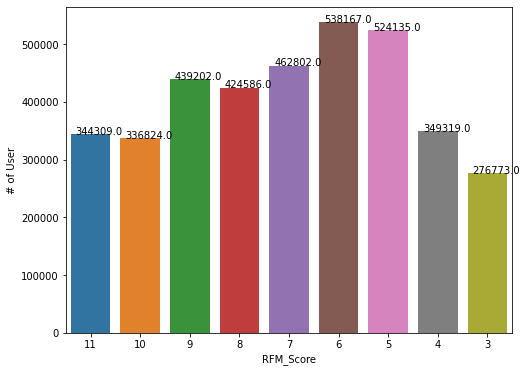

In [58]:
user_no = RFM_Table.groupby('RFM_Score').agg({'R': 'count'})
user_no = user_no.reset_index().sort_values(['RFM_Score'], ascending=False)
user_no.rename(columns={'R': '# of User'}, inplace=True)

# barplot
plt.figure(figsize=(8,6))
ax = sns.barplot(data=user_no, x='RFM_Score', y='# of User',
                 order=user_no['RFM_Score'])
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x()+0.1, i.get_height()+5))

RFM 점수 6에 해당하는 고객이 가장 많은 것을 확인 할 수 있습니다.

최근성 X 빈도 히트맵을 그립니다.

In [40]:
RxF = RFM_Table.reset_index().pivot_table(index='R', columns='F', 
                                          values='user_id', aggfunc='count')
total = RxF.sum().sum()
print(RxF)

F       1       2       3
R                        
1  503201  262489  102974
2  284193  290252  304406
3  401880  269030  296198
4  249358  258171  473965


In [41]:
RxF = (RxF / total).round(3)
RxF

F,1,2,3
R,,,
1,0.136,0.071,0.028
2,0.077,0.079,0.082
3,0.109,0.073,0.080
4,0.067,0.070,0.128


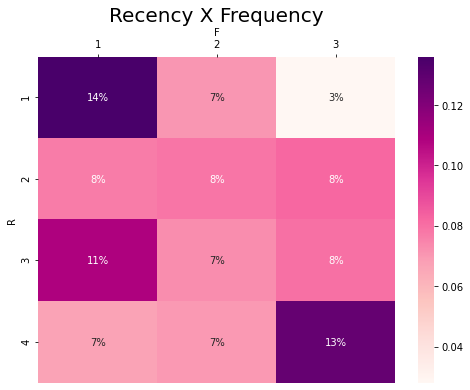

In [66]:
plt.figure(figsize=(8,6))
plt.title('Recency X Frequency', fontsize=20)
ax = sns.heatmap(data=RxF, annot=True, fmt='0.0%', cmap='RdPu')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

4행에 가까울 수록 최근에 사용한 고객이고 3열에 가까울 수록 가장 자주 방문한 고객입니다.
유형별로 분류하자면 아래와 같이 표현할 수 있습니다.

**1행 1열** : 일반 고객(14%)
**1행 3열** : 예전 고객(3%)
**1행 4열** : 신규 고객(7%)
**4행 3열** : 단골 고객(13%)

빈도와 구매 금액도 히트맵을 그릴 수 있습니다.

In [45]:
FxM = RFM_Table.reset_index().pivot_table(index='F', columns='M', 
                                          values='user_id', aggfunc='count')
total = FxM.sum().sum()
print(FxM)

M       1       2       3       4
F                                
1  791644  470567  171895    4526
2  130322  385724  431920  131976
3    3879   67098  319120  787446


In [46]:
FxM = (FxM / total).round(3)
FxM

M,1,2,3,4
F,,,,
1,0.214,0.127,0.047,0.001
2,0.035,0.104,0.117,0.036
3,0.001,0.018,0.086,0.213


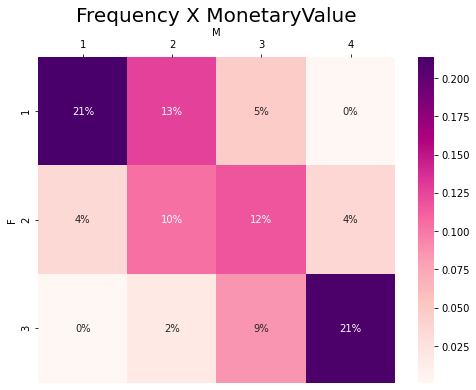

In [65]:
plt.figure(figsize=(8,6))
plt.title('Frequency X MonetaryValue', fontsize=20)
ax = sns.heatmap(data=FxM, annot=True, fmt='0.0%', cmap='RdPu')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

3행에 가까울 수록 자주 방문한 고객이고 4열에 가까울 수록 많은 금액을 구매한 고객입니다.
유형별로 분류하자면 아래와 같이 표현할 수 있습니다.

**1행 1열** : 일반 고객(21%)
**4행 3열** : VIP 고객(21%)

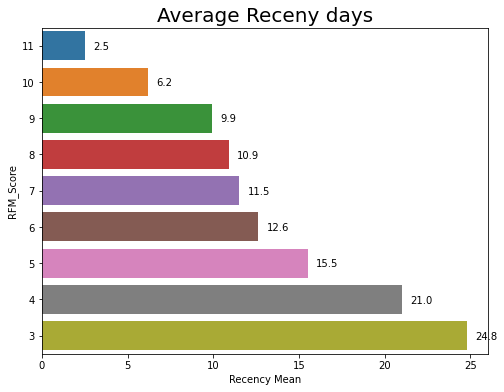

In [43]:
Ave_Recency = RFM_Summary.iloc[:,[5]].sort_index(ascending=False).reset_index()
Ave_Recency.RFM_Score = Ave_Recency.RFM_Score.astype('category')

plt.figure(figsize=(8,6))
plt.title('Average Receny days', fontsize=20)
ax = sns.barplot(data=Ave_Recency,x='Recency Mean', y='RFM_Score', 
                 order=Ave_Recency['RFM_Score'])
for i in ax.patches:
    ax.annotate(i.get_width(), (i.get_width()+0.5, i.get_y()+0.5))

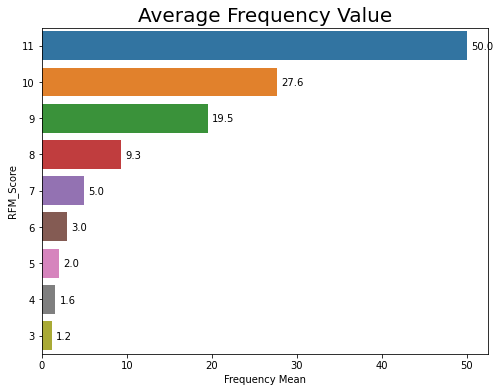

In [72]:
Ave_Freq = RFM_Summary.iloc[:,[6]].sort_index(ascending=False).reset_index()
Ave_Freq.RFM_Score = Ave_Freq.RFM_Score.astype('category')

plt.figure(figsize=(8,6))
plt.title('Average Frequency Value', fontsize=20)
ax = sns.barplot(data=Ave_Freq,x='Frequency Mean', y='RFM_Score', 
                 order=Ave_Freq['RFM_Score'])
for i in ax.patches:
    ax.annotate(i.get_width(), (i.get_width()+0.5, i.get_y()+0.5))

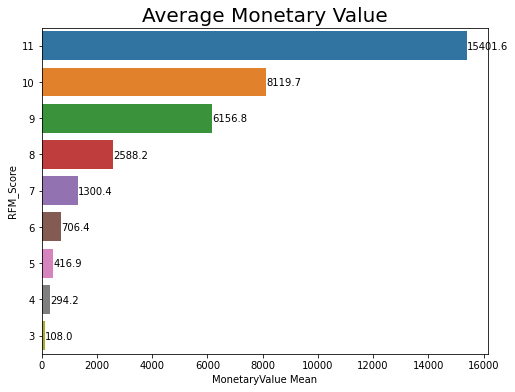

In [44]:
Ave_Money = RFM_Summary.iloc[:,[7]].sort_index(ascending=False).reset_index()
Ave_Money.RFM_Score = Ave_Recency.RFM_Score.astype('category')

plt.figure(figsize=(8,6))
plt.title('Average Monetary Value', fontsize=20)
ax = sns.barplot(data=Ave_Money,x='MonetaryValue Mean', y='RFM_Score', 
                 order=Ave_Money['RFM_Score'])
for i in ax.patches:
    ax.annotate(i.get_width(), (i.get_width()+0.5, i.get_y()+0.5))

고객 그룹 별 R F M 값을 그래프로 비교해 본 결과 모든 항목이 그룹의 RFM 점수의 합과 동일한 순서임을 확인 할 수 있습니다.
따라서 3번 그룹은 과거에 잠깐 접속했던 고객으로 볼 수 있고, 11번 그룹은 오래전부터 지속적으로 큰 금액을 사용하는 VIP 고객으로 볼 수 있습니다.

이렇게 분류한 고객 유형에 따라 프로모션 형태를 달리 가져가면 고객 유치에 도움이 될 것으로 예상됩니다.

그리고 쇼핑몰의 성격에 따라 R F M의 가중치를 다르게 가져가거나 특정한 성격을 가진 고객 그룹을 새로 구성할 수 있으며
고객의 성별, 가구수, 나이, 지역에 대한 정보도 연동 할 수 있다면 고객 성향에 더욱 적합한 프로모션을 기획 할 수 있습니다.